# **Denton Weather Data set**

In [1]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/SumanthNaidu213/weather-prediction/88f7fc112390fdb554ca2ec48c6db5ff066cdf85/Denton_Weather.csv"
response = requests.get(url)
csv_data = response.content.decode("utf-8")
data_frame = pd.read_csv(url)


Here, we are extracting the raw data set for the six-month period of weather in Denton. Also, we are importing the "requests" module, which enables us to send http requests using Python, as well as the "pandas" library, which is utilized when working with data sets. The format for data stored in a table format is ".csv," and we are reading data from this format.

In [2]:
time = data_frame['datetime']
temperature = data_frame['temp']
Humidity = data_frame['humidity']
Dew = data_frame['dew']
Precipitation = data_frame['precip']
Snow = data_frame['snow']
Visibility = data_frame['visibility']
Windgust  = data_frame['windgust']

Here we are choosing 6 features with loaded DataFrame such as time,teemprature,Humidity,Dew,Precipitation,Snow,Visibility from the extracted data set which contains Denton's weather data.

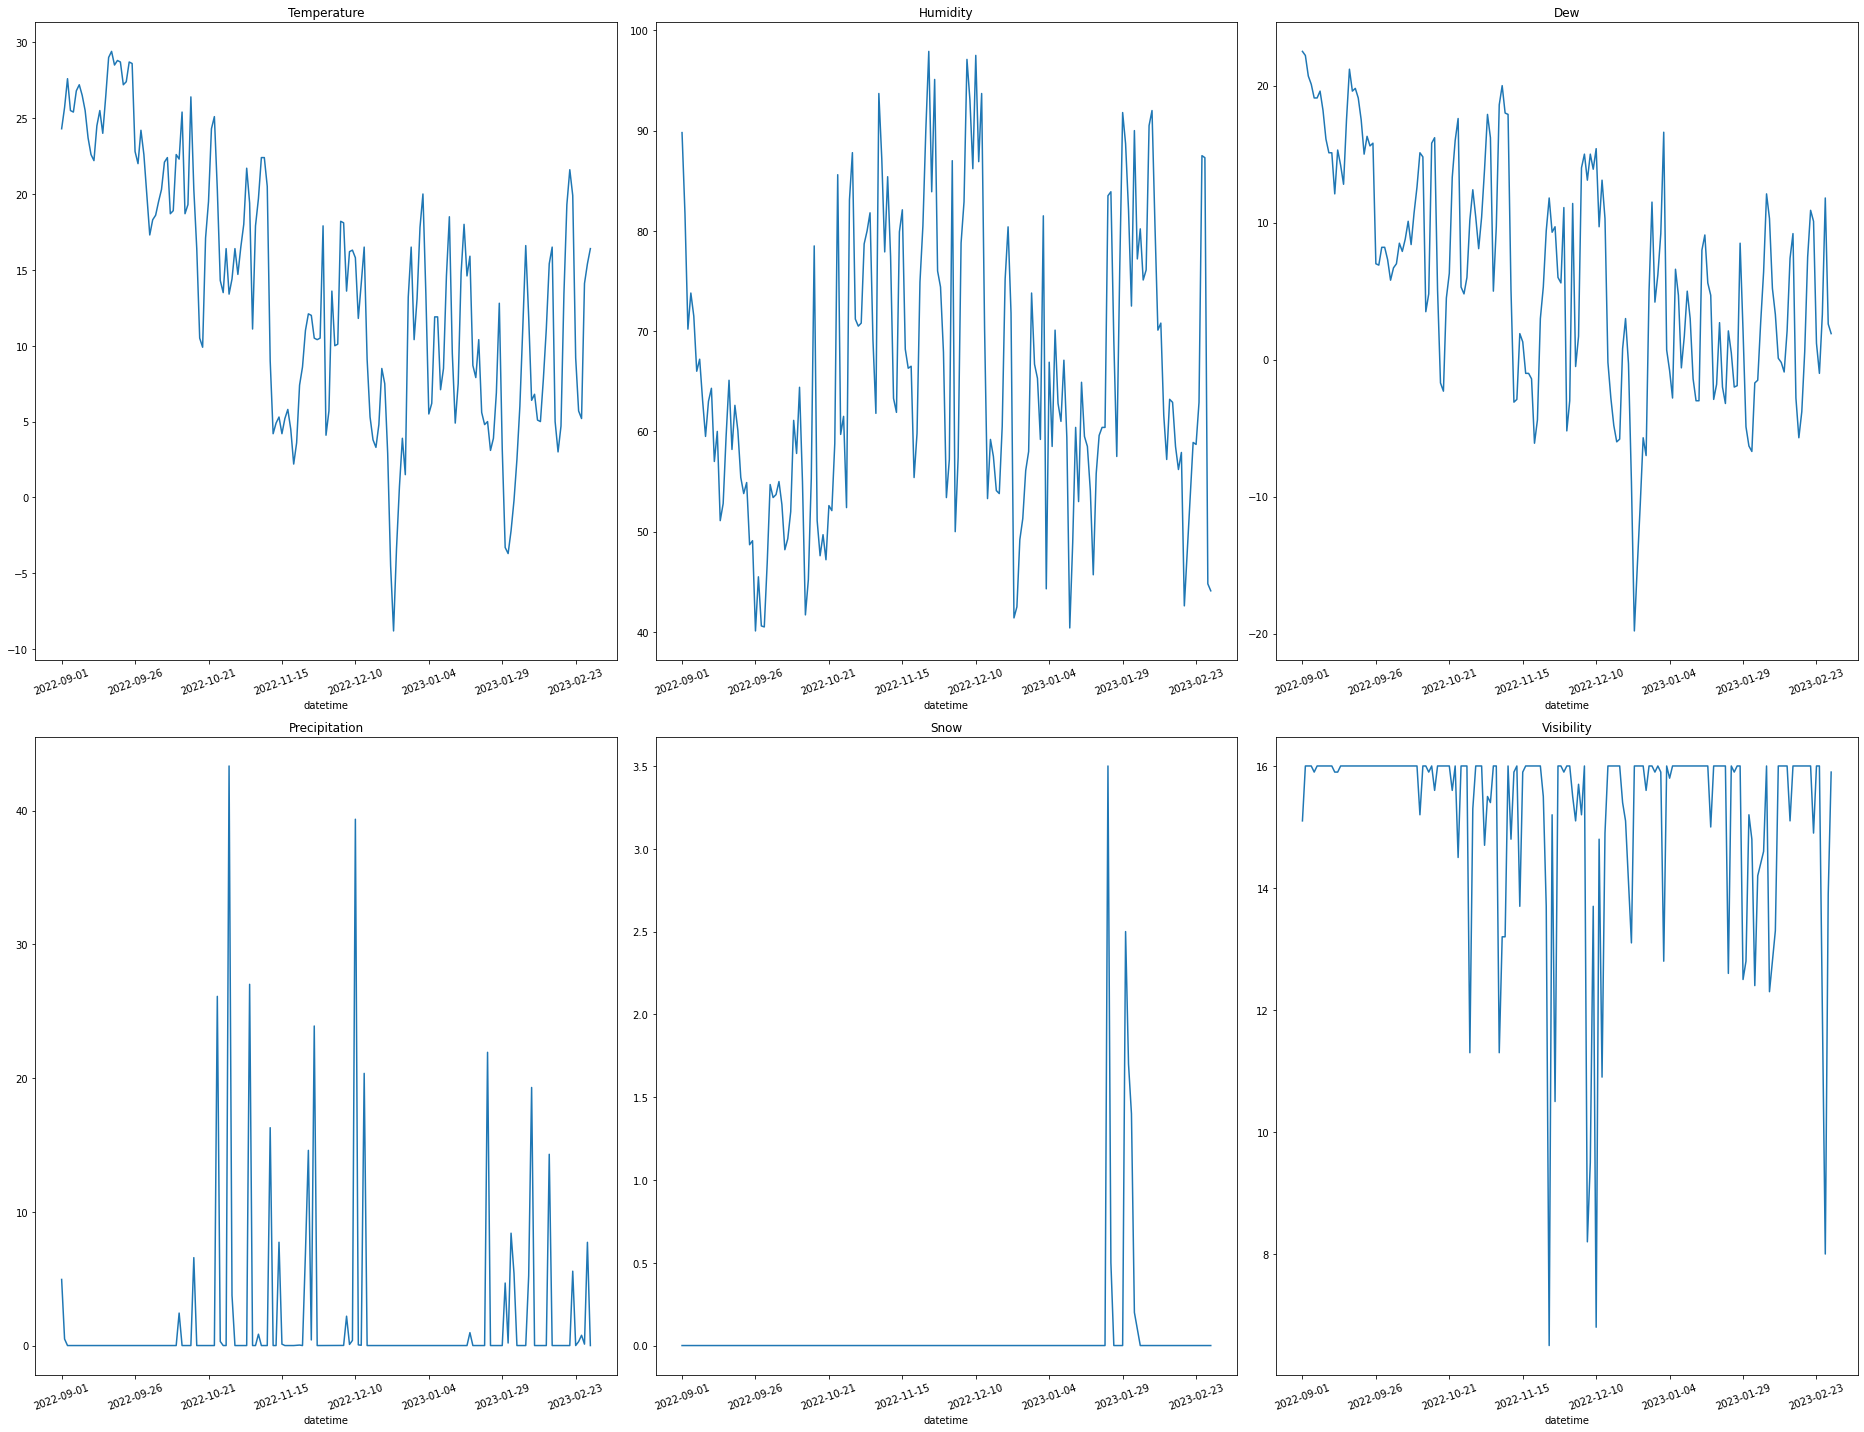

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.subplots(nrows=2, ncols=3, figsize=(26, 20))

ax = plt.subplot(2, 3, 1)
temperature.index = time
temperature.head()
temperature.plot(rot=20)
plt.title('Temperature')

ax = plt.subplot(2, 3, 2)
Humidity.index = time
Humidity.head()
Humidity.plot(rot=20)
plt.title('Humidity')

ax = plt.subplot(2, 3, 3)
Dew.index = time
Dew.head()
Dew.plot(rot=20)
plt.title('Dew')

ax = plt.subplot(2, 3, 4)
Precipitation.index = time
Precipitation.head()
Precipitation.plot(rot=20)
plt.title('Precipitation')

ax = plt.subplot(2, 3, 5)
Snow.index = time
Snow.head()
Snow.plot(rot=20)
plt.title('Snow')

ax = plt.subplot(2, 3, 6)
Visibility.index = time
Visibility.head()
Visibility.plot(rot=20)
plt.title('Visibility')

plt.tight_layout()
plt.show()

The above code snippet uses matplotlib library for creating plot graphs representing weather data in different aspects which mentioned above as features.

By rotating the x-axis by 20 degrees, the variable is plotted against time using the 'plot()' function.'head()' function is used to display the first few rows of that variable.

Here each subplot has a title that is added using the 'title' function.The space between subplots is made better by the usage of the 'tight layout' function.The final plot is shown using the'show' function.

# **Data Preprocessing**

# **Down-sampling**

In [4]:
!curl https://raw.githubusercontent.com/SumanthNaidu213/weather-prediction/88f7fc112390fdb554ca2ec48c6db5ff066cdf85/Denton_Weather.csv



name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
Denton,2022-09-01,27.9,22.3,24.3,30.5,22.3,24.6,22.5,89.8,4.942,100,20.83,rain,0,0,53.6,12.9,177.5,1015.5,46.1,15.1,20.4,1.8,1,60,2022-09-01T07:02:51,2022-09-01T19:53:37,0.19,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoon rain.,rain,"D5204,72259453909,KAFW,KDTO,F7015,72259003927,KDFW,72258903991"
Denton,2022-09-02,29.3,22.9,25.7,33.3,22.9,26.9,22.2,81.7,0.488,100,20.83,rain,0,0,25.2,24.3,176.5,1014.3,41,16,79,6.8,7,75,2022-09-02T07:03:31,2022-09-02T19:52:19,0.23,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance of rain throughout the day.,rain,"72259453909,KAFW,C3518,KDTO,F7015,72259003927,KDFW,72258903991"
Denton,2022-09-03,35.6,

We are choosing 26,000 data points in this case for training. A recording of an observation is made every 10 minutes, or six times an hour. Since no significant change is anticipated over 60 minutes, we will resample the data set down to a single record every hour. This can be executed via the parameter sampling_rate of the method timeseries_dataset_from_array from Keras preprocessing library. So, this argument should be set to 6 to have the required down-sample we are looking for.


# **Data normalization**

In [5]:
def normalize(data):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    return (data - data_mean) / data_std

Here normalize() function takes dataset and calculates mean and standard deviation for every column in dataset.

The dataset is then divided by the standard deviation after each value had the mean subtracted from it. By adjusting the values, the mean and variance are all set to zero for all of the values.

The normalized dataset, which can be utilized for additional analysis or visualization, is returned by the function. By using this function on several datasets, we can make sure that they are all on the same scale and are easier to compare.

In [6]:
features = pd.concat([temperature, Humidity, Dew, Precipitation, Snow, Visibility], axis=1)
features.index = time
features

,temp,humidity,dew,precip,snow,visibility
datetime,,,,,,
2022-09-01,24.3,89.8,22.5,4.942,0.0,15.1
2022-09-02,25.7,81.7,22.2,0.488,0.0,16.0
2022-09-03,27.6,70.2,20.7,0.000,0.0,16.0
2022-09-04,25.5,73.8,20.1,0.000,0.0,16.0
2022-09-05,25.4,71.5,19.1,0.000,0.0,15.9
...,...,...,...,...,...,...
2023-02-24,5.7,62.9,-1.0,0.293,0.0,16.0
2023-02-25,5.2,87.5,3.3,0.769,0.0,12.0
2023-02-26,14.1,87.3,11.8,0.105,0.0,8.0


The above code derives all individual data weather variables into a single dataset gathered called as 'features'.Temperature, humidity, dew, precipitation, snow, and visibility are variables.

The concat() function used to concatenate the individual variables into a single dataset along the columns.'feature' dataset contains all variables in a single dataset with time as index which makes easier to work and analyse data. 

In [7]:
features = normalize(features.values)
features = pd.DataFrame(features)
features

,0,1,2,3,4,5
0,1.242221,1.703945,1.980662,0.484768,-0.153077,-0.080408
1,1.409629,1.140968,1.943693,-0.223880,-0.153077,0.452052
2,1.636827,0.341680,1.758849,-0.301523,-0.153077,0.452052
3,1.385714,0.591892,1.684911,-0.301523,-0.153077,0.452052
4,1.373756,0.432034,1.561681,-0.301523,-0.153077,0.392890
...,...,...,...,...,...,...
176,-0.981924,-0.165694,-0.915236,-0.254905,-0.153077,0.452052
177,-1.041713,1.544087,-0.385348,-0.179172,-0.153077,-1.914440
178,0.022528,1.530187,0.662104,-0.284817,-0.153077,-4.280932
179,0.177979,-1.423704,-0.471609,0.926440,-0.153077,-0.790356


Here the above code valued as same 'feature' dataset using the "normalize" function defined earlier.The dataset are converted into a NumPy array using 'value' attribute.Using the "pd.DataFrame()" function, the normalized array is then returned to a Pandas DataFrame and assigned to the "features" variable once more.

In [8]:
training_size = int ( 0.8 * features.shape[0])  
print(training_size)

train_data = features.loc[0 : training_size - 1]
print(train_data)

val_data = features.loc[training_size:]
print(val_data)

144
            0         1         2         3         4         5
0    1.242221  1.703945  1.980662  0.484768 -0.153077 -0.080408
1    1.409629  1.140968  1.943693 -0.223880 -0.153077  0.452052
2    1.636827  0.341680  1.758849 -0.301523 -0.153077  0.452052
3    1.385714  0.591892  1.684911 -0.301523 -0.153077  0.452052
4    1.373756  0.432034  1.561681 -0.301523 -0.153077  0.392890
..        ...       ...       ...       ...       ...       ...
139  0.237768 -0.777324 -0.212827 -0.147988 -0.153077 -0.139571
140 -0.623191 -1.361151 -1.149372 -0.301523 -0.153077  0.452052
141 -0.718853 -0.659168 -1.013820 -0.301523 -0.153077  0.452052
142 -0.419909 -0.395055 -0.459286 -0.301523 -0.153077  0.452052
143 -0.993882 -0.339453 -1.038466 -0.301523 -0.153077  0.452052

[144 rows x 6 columns]
            0         1         2         3         4         5
144 -1.089544 -0.339453 -1.186341 -0.301523 -0.153077  0.452052
145 -1.065629  1.266074 -0.533224  3.186669  9.642305 -1.559466
146 -1.29282

The above code defines 'feature' dataset which splits into two subsets : a training set and a validation set.

Then, the ".loc[]" method is used to extract the training data from the "features" dataset. You can choose rows and columns from a dataset based on their labels by using the ".loc[]" function. In this instance, it chooses the rows between index 0 and the index that corresponds to the computed training size less one.

The validation data is then taken from the "features" dataset using the same ".loc[]" function, but this time it chooses the rows from the index corresponding to the training size to the end of the dataset.

# **Training dataset**

For each prediction, we will be using the tracking data from the past 3 days, which is equivalent to around 432 timestamp ( 3 × 24 × 6 = 432 ).
This data will be used to predict the temperature after 6 hours into the future, which is equivalent to 36 timestamps before down-sampling.

In [9]:
start = 0
end = start + training_size
print(end)


x_train = train_data.values
y_train = features.iloc[start:end][[0]]

sequence_length = int(60 / 6)

print(sequence_length)

144
10


We used two arrays here named as 'x_train','y_train' demonstrates input and output data where x_train contains a subset of the train_data dataframe and y_train was created by selecting the values contains only temperature correspondane to x_train.

The 'sequence_length' variable used to derive how many time steps included in each sequence input model which corresponds to a total of 1 hour of data.

The outcome is returned as a TensorFlow dataset object, which may be used to train an artificial intelligence model.

In [11]:
from tensorflow import keras

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    data=x_train,
    targets=y_train,
    sequence_length=sequence_length,
    sampling_rate=6,
    batch_size=30,
)

The code snippet defines funtion:'keras.preprocessing.timeseries_dataset_from_array' used to create dataset defined previously as x_train and y_train arrays.'sequence_length' specifys parameter as how many steps to include in each sequence and 'sampling_rate' specifys how many steps to skip b/w sequence. 

# **Validation dataset**

In [15]:
x_val_end = len(val_data) - start

print(x_val_end)

label_start = training_size + start

x_val = val_data.iloc[:x_val_end][[i for i in range(6)]].values
y_val = features.iloc[label_start:][[0]]

print(x_val)
print(y_val)

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length
)


37
[[-1.08954426e+00 -3.39452666e-01 -1.18634125e+00 -3.01522787e-01
  -1.53077003e-01  4.52052280e-01]
 [-1.06562873e+00  1.26607397e+00 -5.33223795e-01  3.18666880e+00
   9.64230497e+00 -1.55946596e+00]
 [-1.29282632e+00  1.29387529e+00 -7.30391327e-01 -3.01522787e-01
   1.24626328e+00  4.52052280e-01]
 [-1.19716417e+00  2.58275863e-01 -1.03846560e+00 -3.01522787e-01
  -1.53077003e-01  3.92889978e-01]
 [-8.38431131e-01 -5.41012286e-01 -1.02614263e+00 -3.01522787e-01
  -1.53077003e-01  4.52052280e-01]
 [-1.32922814e-01  7.44799085e-01  2.55446333e-01 -3.01522787e-01
  -1.53077003e-01  4.52052280e-01]
 [-1.28086855e+00  1.84295150e+00 -5.33223795e-01 -3.01522787e-01
  -1.53077003e-01 -1.61862826e+00]
 [-2.05812348e+00  1.62749122e+00 -1.39583175e+00  4.42128347e-01
   6.84362440e+00 -1.44114136e+00]
 [-2.10595455e+00  1.16876932e+00 -1.56835334e+00 -2.71452169e-01
   4.60467995e+00 -2.12461303e-02]
 [-1.92658803e+00  5.01537474e-01 -1.61764522e+00  1.03510819e+00
   3.76507579e+00 -2.5

This code defines x_val_end as the end index of the validation data, where x_val_end is equal to val data's total length minus start. Label start, which is the product of training size and start, is the start index of the target values in the validation set.

In [16]:
# for i, j in dataset_val:
#   print(i)

# **Creating an LSTM Weather Forecast Model**

In [17]:
for batch in dataset_train.take(1):
    inputs, targets = batch
    
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(name="Weather_forcaster",inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "Weather_forcaster"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 6)]           0         
                                                                 
 lstm (LSTM)                 (None, 32)                4992      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


This code defines a neural network model for weather forecasting for which input shape of the model is the shape of the input data as tensor representing time series data.

The input tensor is supplied to the 32 units that make up the LSTM layer. After passing through a dense layer with one output unit to create the projected value, the LSTM layer's output is then produced.

In [18]:
history = model.fit(
    dataset_train,
    epochs=15,
    validation_data=dataset_val
)

Epoch 1/15
3/3 [==============================] - 4s 296ms/step - loss: 1.1647 - val_loss: 1.3796
Epoch 2/15
3/3 [==============================] - 0s 45ms/step - loss: 1.0727 - val_loss: 1.3749
Epoch 3/15
3/3 [==============================] - 0s 44ms/step - loss: 0.9981 - val_loss: 1.3726
Epoch 4/15
3/3 [==============================] - 0s 41ms/step - loss: 0.9291 - val_loss: 1.3709
Epoch 5/15
3/3 [==============================] - 0s 39ms/step - loss: 0.8633 - val_loss: 1.3692
Epoch 6/15
3/3 [==============================] - 0s 43ms/step - loss: 0.7992 - val_loss: 1.3669
Epoch 7/15
3/3 [==============================] - 0s 46ms/step - loss: 0.7359 - val_loss: 1.3635
Epoch 8/15
3/3 [==============================] - 0s 46ms/step - loss: 0.6731 - val_loss: 1.3588
Epoch 9/15
3/3 [==============================] - 0s 44ms/step - loss: 0.6106 - val_loss: 1.3522
Epoch 10/15
3/3 [==============================] - 0s 49ms/step - loss: 0.5485 - val_loss: 1.3435
Epoch 11/15
3/3 [===========

The code is training LSTM model on the 'dataset_train'and validating it on the 'dataset_val'. As it trains 15 epoch's and saves 'history'

By iterating through the dataset's batches and using the Adam optimizer with a learning rate of 0.001, the model is fitted to the dataset train during each epoch.

The model is evaluated against the dataset val at the end of each epoch, and the validation loss is noted in the history.

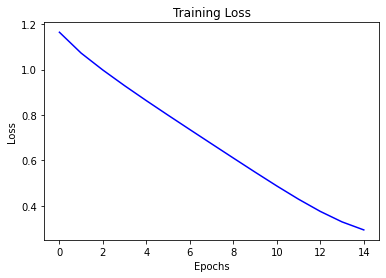

In [19]:
loss = history.history["loss"]
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

This code has outcomes to plot a graph representing trainig loss over number of epochs. The y-axis of the graph reflects the value of the loss function for that epoch, and the x-axis of the graph represents the number of epochs (iterations) for which the model was trained.

The graph demonstrates how the loss falls across the epochs, demonstrating that the model is becoming more accurate in its predictions.

1/1 [==============================] - 1s 509ms/step


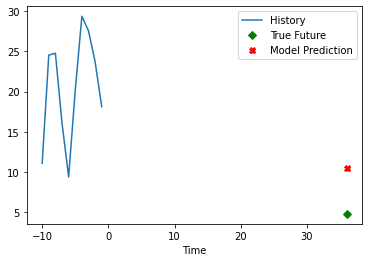

In [ ]:
temp_mean = temperature.mean(axis=0)
temp_std = temperature.std(axis=0)

for x, y in dataset_val:
    history_data = x[0][:, 1].numpy() * temp_std + temp_mean
    true_value = y[0].numpy() * temp_std + temp_mean
    prediction = model.predict(x)[0] * temp_std + temp_mean
    time_steps = list(range(-(history_data.shape[0]), 0))
    plt.plot(time_steps, history_data)
    plt.plot(36, true_value, "gD")
    plt.plot(36, prediction, "rX")
    plt.legend(["History", "True Future", "Model Prediction"])
    plt.xlabel("Time")
    plt.show()
    break

The visualized code finally results the full trained model for predicting weather using the validation dataset.

The plot shows how well the model is able to predict the true temperature value for the future time step, based on the historical temperature data.